In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


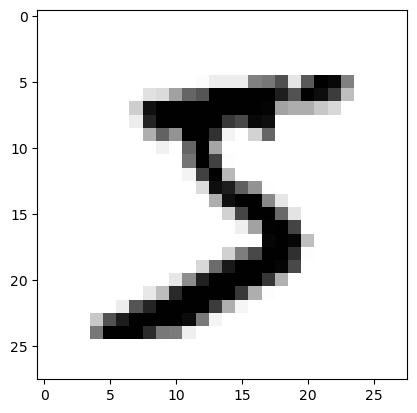

In [3]:
plt.imshow(X_train[0], cmap='grey_r')
plt.show()

In [4]:
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%-3s' % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [5]:
print(X_train[0].shape)
print(len(X_train[0].reshape(-1,)))


(28, 28)
784


In [6]:
#차원 변환 과정
#Dense는 인자로 샘플수, 피처수 를 받는데, 피처수를 1차원 벡터형태로 받는다.
#따라서 샘플수는 -1로 알아서 계산되도록 두고, 2차원인 피처를 1차원 벡터형태로 변환해야한다.
X_train = X_train.reshape(-1, 784)
X_train = X_train.astype('float64')
X_train = X_train/255

X_test = X_test.reshape(-1, 784).astype('float64')/255

In [7]:
print('class : %d' % (y_train[0]))

class : 5


In [8]:
#바이너리 과정
#to_categorical => 원핫 인코딩 해주는 함수
#첫번째 인자는 변환할 데이터, 두번쨰는 클래수 수
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 딥러닝 기본 프레임 만들기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

(X_train, y_train),(X_test,y_test) = mnist.load_data()

#차원변환 및 정규화
X_train = X_train.reshape(-1, 784).astype('float64')/255
X_test = X_test.reshape(-1, 784).astype('float64')/255

#원핫 인코딩 to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#모델 구조 설정
model = Sequential()
#input_dim은 학습시키려는 피처의 개수 입력
model.add(Dense(512, input_dim = 784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 트러블 슈팅
모델 학습 중 쥬피터 노트북 커널 충돌로 커널 종료 현상 발생
```
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
OMP: Error #15: Initializing libiomp5, but found libiomp5md.dll already initialized.
OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program. That is dangerous, since it can degrade performance or cause incorrect results. The best thing to do is to ensure that only a single OpenMP runtime is linked into the process, e.g. by avoiding static linking of the OpenMP runtime in any library. As an unsafe, unsupported, undocumented workaround you can set the environment variable KMP_DUPLICATE_LIB_OK=TRUE to allow the program to continue to execute, but that may cause crashes or silently produce incorrect results. For more information, please see http://openmp.llvm.org/
```

### 발생원인
##### intelMKL(고속 연산에 특화)라이브러리가 OpenMP라는 병렬  처리 라이브러리를 사용하려고 초기화 할때 Tensorflow또한 해당 라이브러를 초기화 해서 충돌이 발생한다.

### 문제 해결 방안

1. `import os`
    `os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'`
2. `conda install nomkl`

1번은 매번 import 해줘야해서, nomkl설치 후 정상작동 된다.


### 라이브러리 비활성화 해도 괜찮아?
Tensorflow 또는 Pytorch에는 자체 GPU연산 라이브러리를 사용하기 때문에 딥러닝 모델 학습속도에 크게 영향을 주지않는다.

In [ ]:
#모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 저장 경로 설정
model_path = './models/MNIST_MLP.keras'
dir_path = os.path.dirname(model_path)

if not os.path.exists(dir_path):
  os.makedirs(dir_path)

#모델 최적화
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=2,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

#모델 실행
history = model.fit(X_train, y_train, validation_split=0.25,  epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback,checkpointer])

#테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18949, saving model to ./model\MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18949 to 0.13515, saving model to ./model\MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13515 to 0.11209, saving model to ./model\MNIST_MLP.keras

Epoch 4: val_loss improved from 0.11209 to 0.09859, saving model to ./model\MNIST_MLP.keras

Epoch 5: val_loss improved from 0.09859 to 0.09457, saving model to ./model\MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09457 to 0.08383, saving model to ./model\MNIST_MLP.keras

Epoch 7: val_loss improved from 0.08383 to 0.08274, saving model to ./model\MNIST_MLP.keras

Epoch 8: val_loss did not improve from 0.08274

Epoch 9: val_loss did not improve from 0.08274

Epoch 10: val_loss did not improve from 0.08274

Epoch 11: val_loss improved from 0.08274 to 0.07706, saving model to ./model\MNIST_MLP.keras

Epoch 12: val_loss did not improve from 0.07706

Epoch 13: val_loss did not improve from 0.07706

Epoch 14: val_l

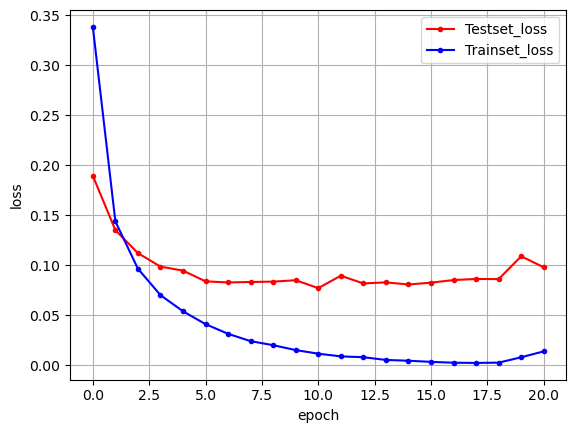

In [11]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()